# <center>heart disease prediction</center>

![Heart](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ9feua_O3TJPzmEkk62CCJ8IGNlDYHZgW9bX9l8kUB-7rrgJM9nalXv1K1te6d7iWsM-M&usqp=CAU "Heart")


## import library

In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## read data

In [ ]:
Heart_data=pd.read_csv("heart.csv")
Heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## <font color="red">Attribute Information:</font>

Age: age of the patient [years]<br>

Sex: sex of the patient [M: Male, F: Female]<br>

ChestPainType (ألم الصدر): chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br>

RestingBP(ضغظ الدم): resting blood pressure A normal blood pressure level is less than 120/80 mmHg[mm Hg]<br>

Cholesterol: serum cholesterol [mm/dl]<br>

FastingBS(معدل السكر فى الدم): fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]<br>

RestingECG: resting electrocardiogram results If the test is normal, it should show that your heart is beating at an even rate of 60 to 100 beats per minute. [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br>

MaxHR:معدل ضربات القلب maximum heart rate achieved [Numeric value between 60 and 202]<br>

ExerciseAngina: exercise-induced angina(الذبحة الصدرية الناتجة عن ممارسة الرياضة) [Y: Yes, N: No]<br>

Oldpeak: oldpeak = ST [Numeric value measured in depression]<br>

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br>

HeartDisease: output class [1: heart disease, 0: Normal]<br>

## Explor data

In [ ]:
Heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# there is not have null value in data
Heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
Heart_data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
Heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df1=Heart_data.copy()

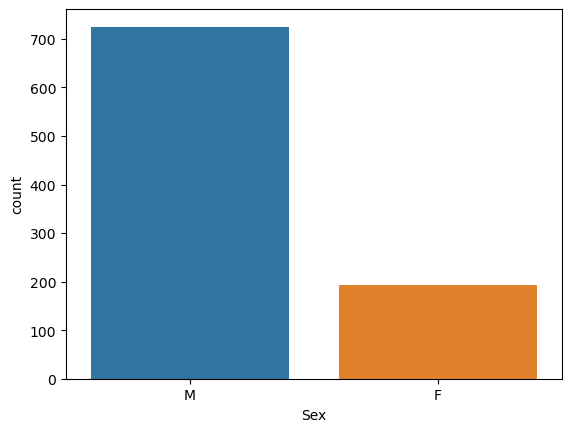

In [ ]:
sns.countplot(x="Sex", data=Heart_data)
plt.show()

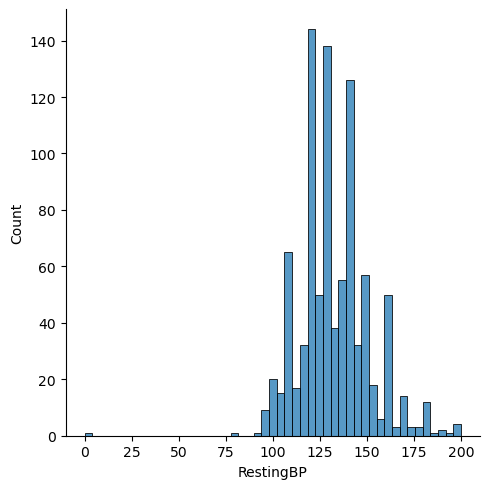

In [ ]:
#resting blood pressure A normal blood pressure level is less than 120/80 mmHg [mm Hg]

sns.displot(df1, x="RestingBP")
plt.show()

#### this is data that have normal data A normal blood pressure level is less than 120/80 mmHg [mm Hg]

In [ ]:
qq=df1[(df1["RestingBP"]>=120) | (df1["RestingBP"]<=80)]
qq

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


#### this data has Resting DB high blood pressure is considered to be 140/90mmHg or higher. low blood pressure is considered to be 90/60mmHg or lower

In [ ]:
df1[(df1["RestingBP"]>=145)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
23,44,M,ATA,150,288,0,Normal,150,Y,3.0,Flat,1
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
34,43,F,ATA,150,186,0,Normal,154,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
893,57,M,ATA,154,232,0,LVH,164,N,0.0,Up,1
899,61,M,ASY,148,203,0,Normal,161,N,0.0,Up,1
901,58,F,ASY,170,225,1,LVH,146,Y,2.8,Flat,1
905,67,M,NAP,152,212,0,LVH,150,N,0.8,Flat,1


#### no more 1 record less than 60 (it maybe dead ) i drope it

In [ ]:
inqq=df1[(df1["RestingBP"]<=60)].index
qq=df1[(df1["RestingBP"]<=60)]
qq

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [ ]:
df1.iloc[449]

Age                   55
Sex                    M
ChestPainType        NAP
RestingBP              0
Cholesterol            0
FastingBS              0
RestingECG        Normal
MaxHR                155
ExerciseAngina         N
Oldpeak              1.5
ST_Slope            Flat
HeartDisease           1
Name: 449, dtype: object

In [ ]:
df1.drop(df1[(df1["RestingBP"]<=60)].index,inplace=True)


In [ ]:
df1.reset_index()

,index,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
913,914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
914,915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
915,916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df1.shape

(917, 12)

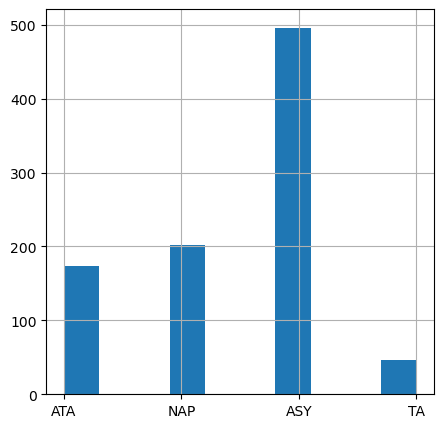

In [ ]:
#ChestPainType: chest pain type [TA: Typical Angina(ذبحه صدريه ), ATA: Atypical Angina ذبحه صدريه اللانمطيه, NAP: Non-Anginal Pain , ASY: Asymptomatic]
df1["ChestPainType"].hist(figsize = (5, 5))
plt.show()

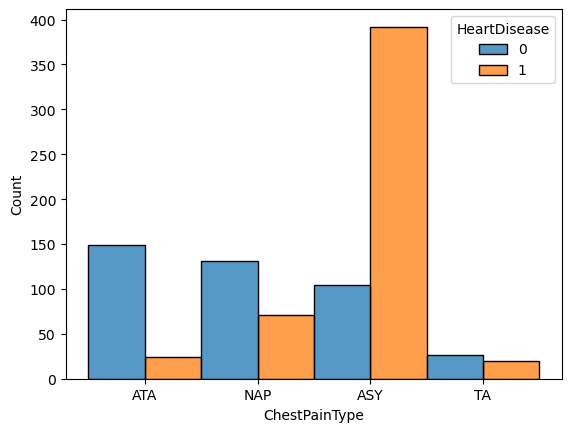

In [ ]:
sns.histplot(data=df1,x="ChestPainType",hue="HeartDisease",multiple="dodge" )
plt.show()

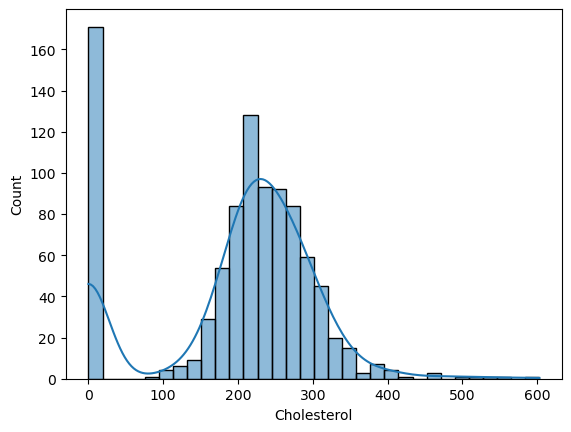

In [ ]:
sns.histplot(df1, x="Cholesterol",kde=True)
plt.show()

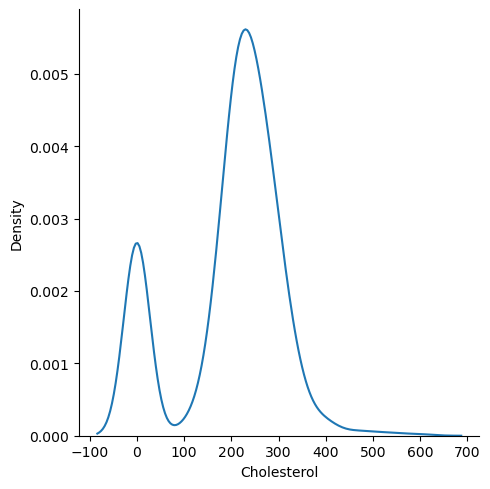

In [ ]:
sns.displot(df1, x="Cholesterol", kind="kde")
plt.show()

In [ ]:
df1.Cholesterol.describe()

count    917.000000
mean     199.016358
std      109.246330
min        0.000000
25%      174.000000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [ ]:
df1[df1["Cholesterol"]>500]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [ ]:
df1.drop(df1[df1["Cholesterol"]>500].index,inplace=True)


In [ ]:
df1.reindex()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df1.drop(df1[df1["Cholesterol"]>420].index,inplace=True)

In [ ]:
df1["FastingBS"].value_counts()

0    698
1    211
Name: FastingBS, dtype: int64

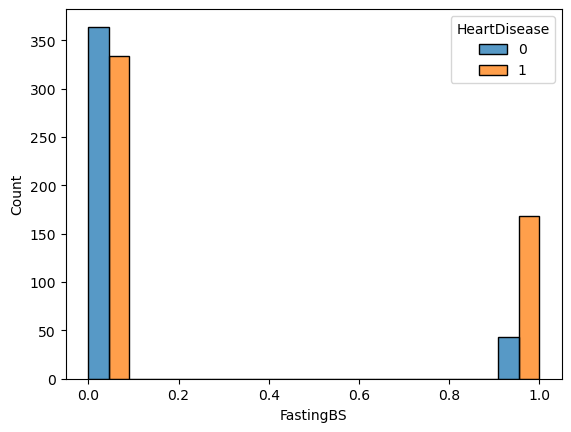

In [ ]:
#fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
sns.histplot(data=df1,x="FastingBS",hue="HeartDisease",multiple="dodge")
plt.show()

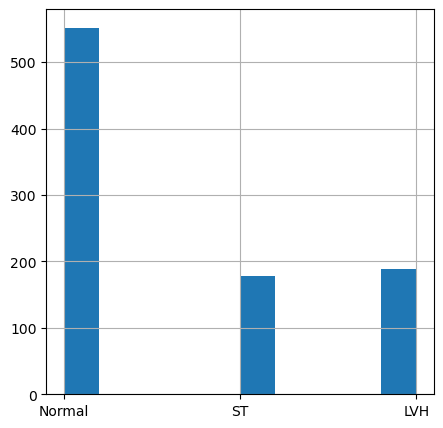

In [ ]:
Heart_data["RestingECG"].hist(figsize = (5, 5))
plt.show()

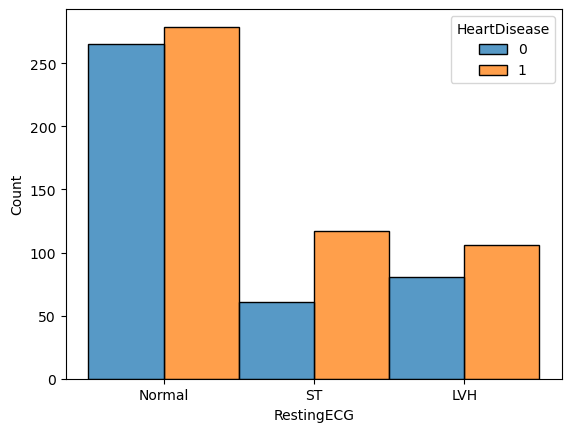

In [ ]:
sns.histplot(data=df1,x="RestingECG",hue="HeartDisease",multiple="dodge" )
plt.show()

In [ ]:
df1.shape

(909, 12)

In [ ]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df1.MaxHR

0      172
1      156
2       98
3      108
4      122
      ... 
913    132
914    141
915    115
916    174
917    173
Name: MaxHR, Length: 909, dtype: int64

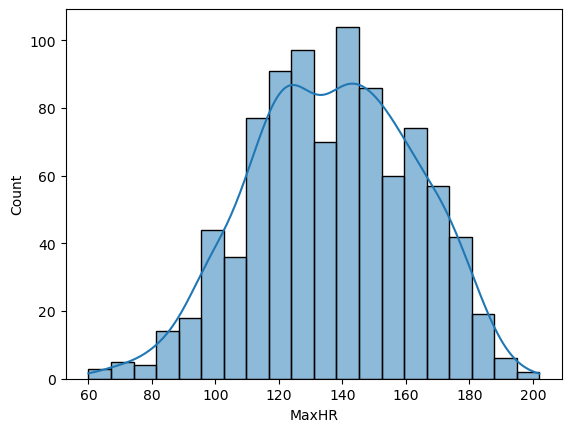

In [ ]:
sns.histplot(df1,x="MaxHR",kde=True)
plt.show()

In [ ]:
df1.ExerciseAngina.value_counts()

N    540
Y    369
Name: ExerciseAngina, dtype: int64

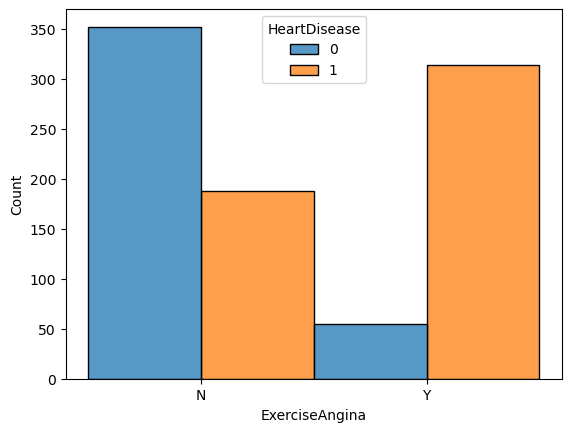

In [ ]:
sns.histplot(data=df1,x="ExerciseAngina",hue="HeartDisease",multiple="dodge" )
plt.show()

#### Oldpeak : Numeric value measured in depression

In [ ]:
df1.Oldpeak.describe()

count    909.000000
mean       0.889439
std        1.069747
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

In [ ]:
df1[df1["Oldpeak"]<0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,M,ASY,100,0,1,Normal,109,N,-0.9,Flat,1
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
325,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1
326,45,M,NAP,110,0,0,Normal,138,N,-0.1,Up,0
331,56,M,ASY,115,0,1,ST,82,N,-1.0,Up,1
332,38,M,NAP,100,0,0,Normal,179,N,-1.1,Up,0
334,51,M,ASY,130,0,1,Normal,170,N,-0.7,Up,1
335,62,M,TA,120,0,1,LVH,134,N,-0.8,Flat,1
352,56,M,ASY,120,0,0,ST,100,Y,-1.0,Down,1
407,62,M,ASY,115,0,1,Normal,72,Y,-0.5,Flat,1


In [ ]:
df1[df1["Oldpeak"]>3]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
68,52,M,ASY,160,246,0,ST,82,Y,4.0,Flat,1
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
337,63,M,ASY,150,0,1,ST,154,N,3.7,Up,1
500,65,M,ASY,136,248,0,Normal,140,Y,4.0,Down,1
521,61,M,ASY,120,282,0,ST,135,Y,4.0,Down,1
537,74,M,ASY,150,258,1,ST,130,Y,4.0,Down,1
541,76,M,NAP,104,113,0,LVH,120,N,3.5,Down,1
559,64,M,ASY,134,273,0,Normal,102,Y,4.0,Down,1
624,63,F,ASY,150,407,0,LVH,154,N,4.0,Flat,1
632,53,M,ASY,140,203,1,LVH,155,Y,3.1,Down,1


In [ ]:
df1.ST_Slope.value_counts()

Flat    453
Up      394
Down     62
Name: ST_Slope, dtype: int64

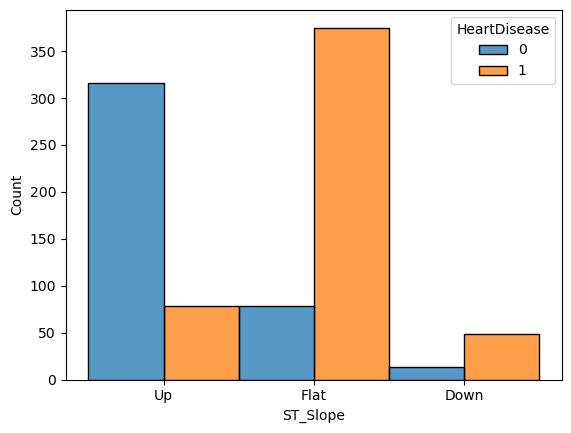

In [ ]:
sns.histplot(data=df1,x="ST_Slope",hue="HeartDisease",multiple="dodge" )
plt.show()

In [ ]:
#Age	RestingBP	Cholesterol	FastingBS	MaxHR	Oldpeak	HeartDisease
numrilcal_df=df1[["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease"]]
numrilcal_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


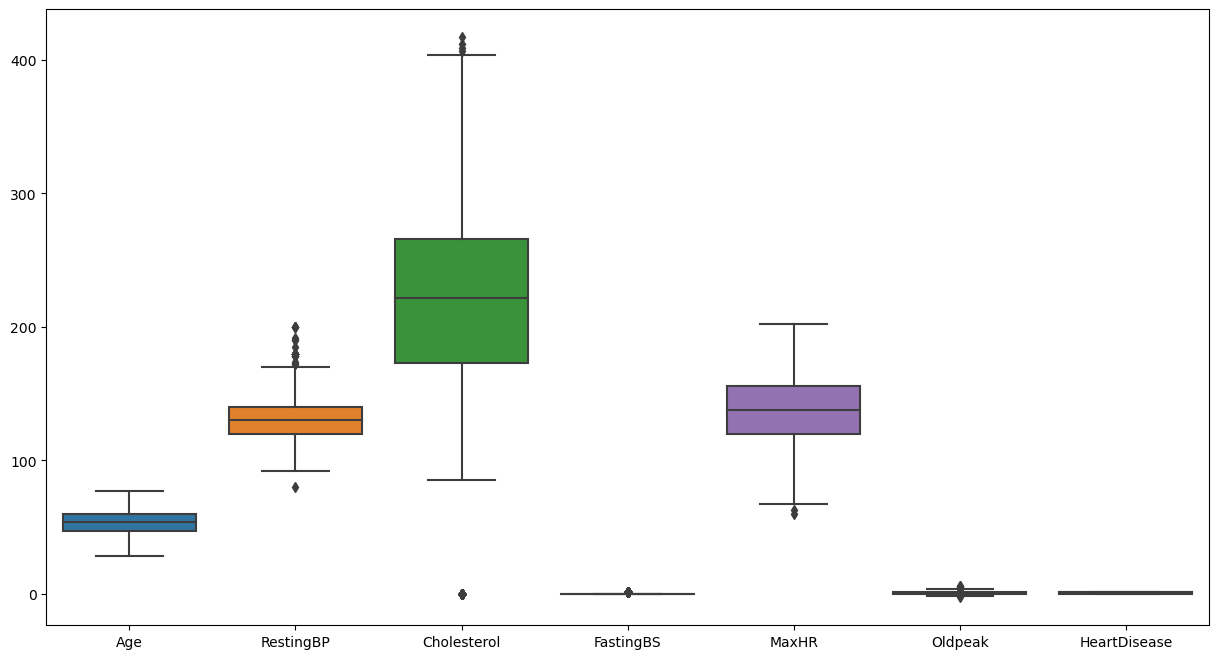

In [ ]:
#sns.boxplot(data=df, x="age", y="class")
plt.figure(figsize=(15,8))
sns.boxplot(data=numrilcal_df)
plt.show()

In [ ]:
fig = px.box(numrilcal_df)
fig.show()

In [ ]:
df1.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.263713,-0.091070,0.201190,-0.386224,0.256470,0.291807
RestingBP,0.263713,1.000000,0.102588,0.068892,-0.109669,0.174761,0.116997
Cholesterol,-0.091070,0.102588,1.000000,-0.283204,0.255409,0.060463,-0.246377
FastingBS,0.201190,0.068892,-0.283204,1.000000,-0.127510,0.051250,0.269734
MaxHR,-0.386224,-0.109669,0.255409,-0.127510,1.000000,-0.163564,-0.407211
Oldpeak,0.256470,0.174761,0.060463,0.051250,-0.163564,1.000000,0.408262
HeartDisease,0.291807,0.116997,-0.246377,0.269734,-0.407211,0.408262,1.000000


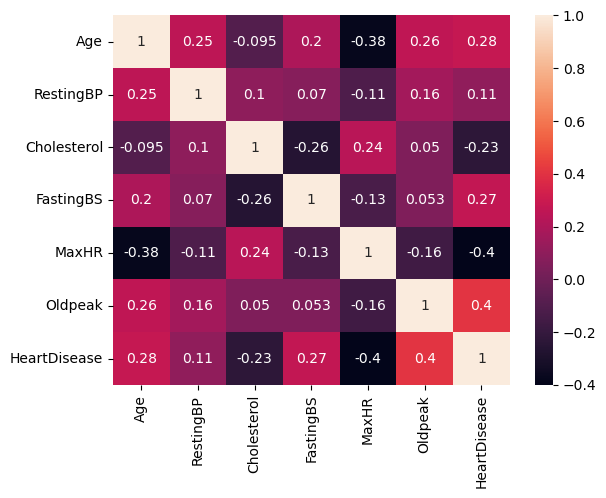

In [ ]:
sns.heatmap(Heart_data.corr(), annot=True)
plt.show()

In [ ]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Encoding data 

In [ ]:
data_modeling=df1.copy()

In [ ]:
from sklearn import preprocessing
encoding=preprocessing.LabelEncoder()
data_modeling["Sex"]=encoding.fit_transform(data_modeling["Sex"])
data_modeling["ChestPainType"]=encoding.fit_transform(data_modeling["ChestPainType"])
data_modeling["RestingECG"]=encoding.fit_transform(data_modeling["RestingECG"])
data_modeling["ST_Slope"]=encoding.fit_transform(data_modeling["ST_Slope"])
data_modeling["ExerciseAngina"]=encoding.fit_transform(data_modeling["ExerciseAngina"])


In [ ]:
data_modeling

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


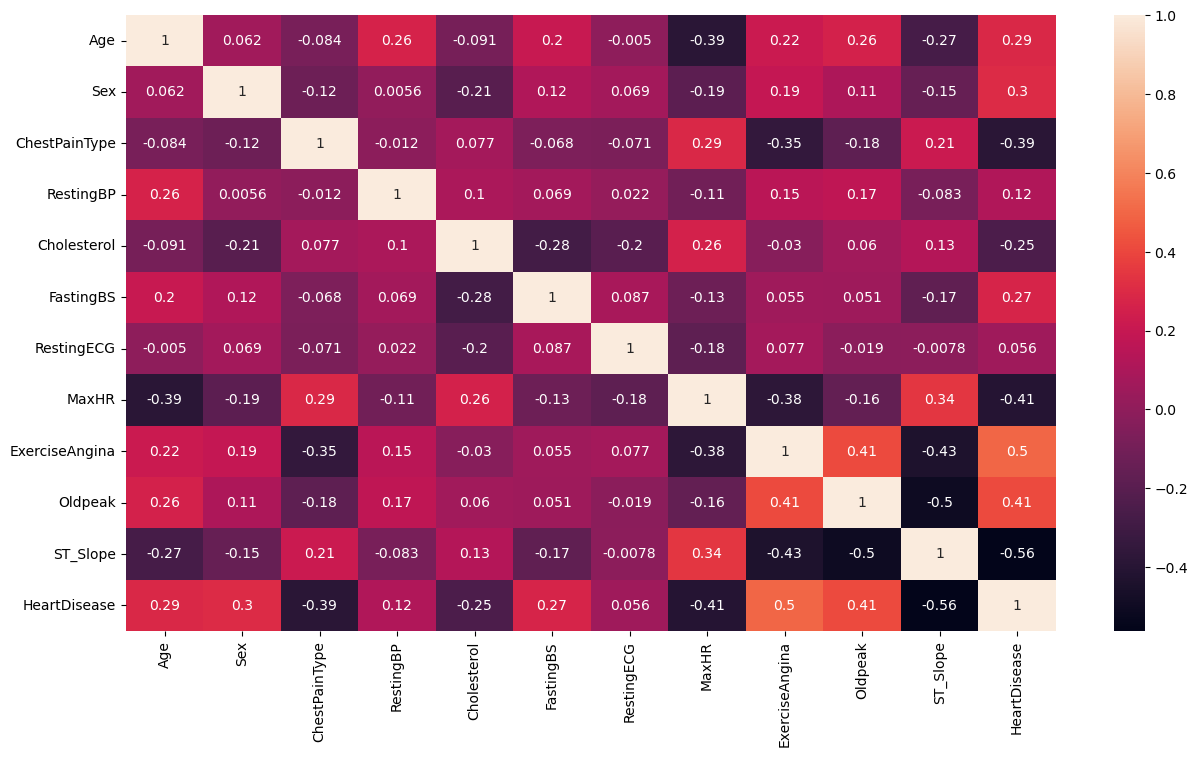

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data_modeling.corr(), annot=True)
plt.show()

In [ ]:
data_modeling.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

### choose feature 


In [ ]:
mod_data=data_modeling[["Age","RestingBP","FastingBS","ExerciseAngina","HeartDisease"]]

In [ ]:
mod_data

,Age,RestingBP,FastingBS,ExerciseAngina,HeartDisease
0,40,140,0,0,0
1,49,160,0,0,1
2,37,130,0,0,0
3,48,138,0,1,1
4,54,150,0,0,0
...,...,...,...,...,...
913,45,110,0,0,1
914,68,144,1,0,1
915,57,130,0,1,1
916,57,130,0,0,1


In [ ]:
mod_data.dtypes

Age               int64
RestingBP         int64
FastingBS         int64
ExerciseAngina    int32
HeartDisease      int64
dtype: object

In [ ]:
X = mod_data.iloc[:, :-1].values
y = mod_data.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((727, 4), (182, 4), (727,), (182,))

# SVM

In [ ]:
#kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state=27)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=27)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0], dtype=int64)

In [ ]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0], dtype=int64)

In [ ]:
c_matrix=confusion_matrix(y_pred,y_test)

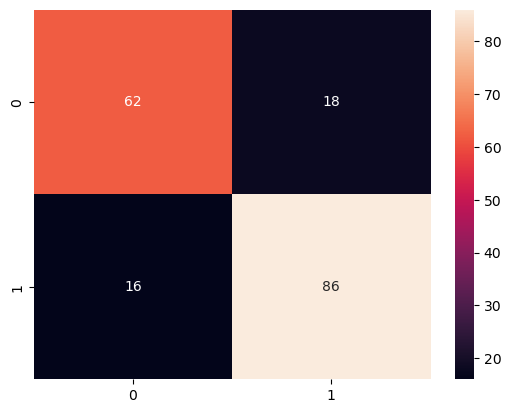

In [ ]:
sns.heatmap(c_matrix, annot=True)
plt.show()

In [ ]:
accuracy_score(y_test,y_pred)

0.8131868131868132

# KNN MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
test_preds = knn_model.predict(X_test)

In [ ]:
test_preds

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0], dtype=int64)

In [ ]:
knn_model.score(X_train, y_train)

0.7799174690508941

In [ ]:
knn_model.score(X_test, y_test) 

0.6263736263736264

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred_Log = logreg.predict(X_test)

In [ ]:
y_pred_Log

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0], dtype=int64)

In [ ]:
y_test

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0], dtype=int64)

In [ ]:
accuracy_score(y_test, y_pred_Log)

0.8131868131868132

# KMeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X

array([[ 40, 140,   0,   0],
       [ 49, 160,   0,   0],
       [ 37, 130,   0,   0],
       ...,
       [ 57, 130,   0,   1],
       [ 57, 130,   0,   0],
       [ 38, 138,   0,   0]], dtype=int64)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=2).fit(X)
kmeans.labels_

array([0, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 0, 1,
       2, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1,
       0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 2, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 1, 0, 2, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2,
       1, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0,
       1, 1, 0, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1,

In [ ]:
kmeans.cluster_centers_

array([[ 55.1646778 , 134.69689737,   0.23627685,   0.45346062],
       [ 49.66876972, 114.6466877 ,   0.19242902,   0.29968454],
       [ 56.69364162, 160.41040462,   0.29479769,   0.48554913]])